<a href="https://colab.research.google.com/github/r-shah1904/Image-classifier/blob/main/Dog_breed_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dog breed Classification
This notebook uses multiclass classification and works as an image classifier using Tensorflow 2.0 and Tensorflow Hub.

## Problem Definition
Build a model which can identify the dog breed from an image of a dog fed to the model

## Data
The data used is available at: https://www.kaggle.com/competitions/dog-breed-identification/data

## Evaluations
The evaluation is a file with the prediction probablities for each dog breed of test image

## Features
Information about the data:
1. We are dealing with images(unstructured data) hence it is best to use deep learning and transfer learning
2. There are 120 breeds of dogs (This means that there a total of 120 different classes)
3. 10000+ images in the training and the test set.


## Getting the workspace ready

In [ ]:
# importing tools
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# Checking the availability of a GPU
if tf.config.list_physical_devices("GPU"):
  print("GPU available")
else:
  print("GPU unavailable")

GPU available


## Getting the data Ready
Turning the data into tensors

In [ ]:
# Reading the labels.csv file
labels = pd.read_csv("drive/MyDrive/dogVision/labels.csv")
labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


<Axes: >

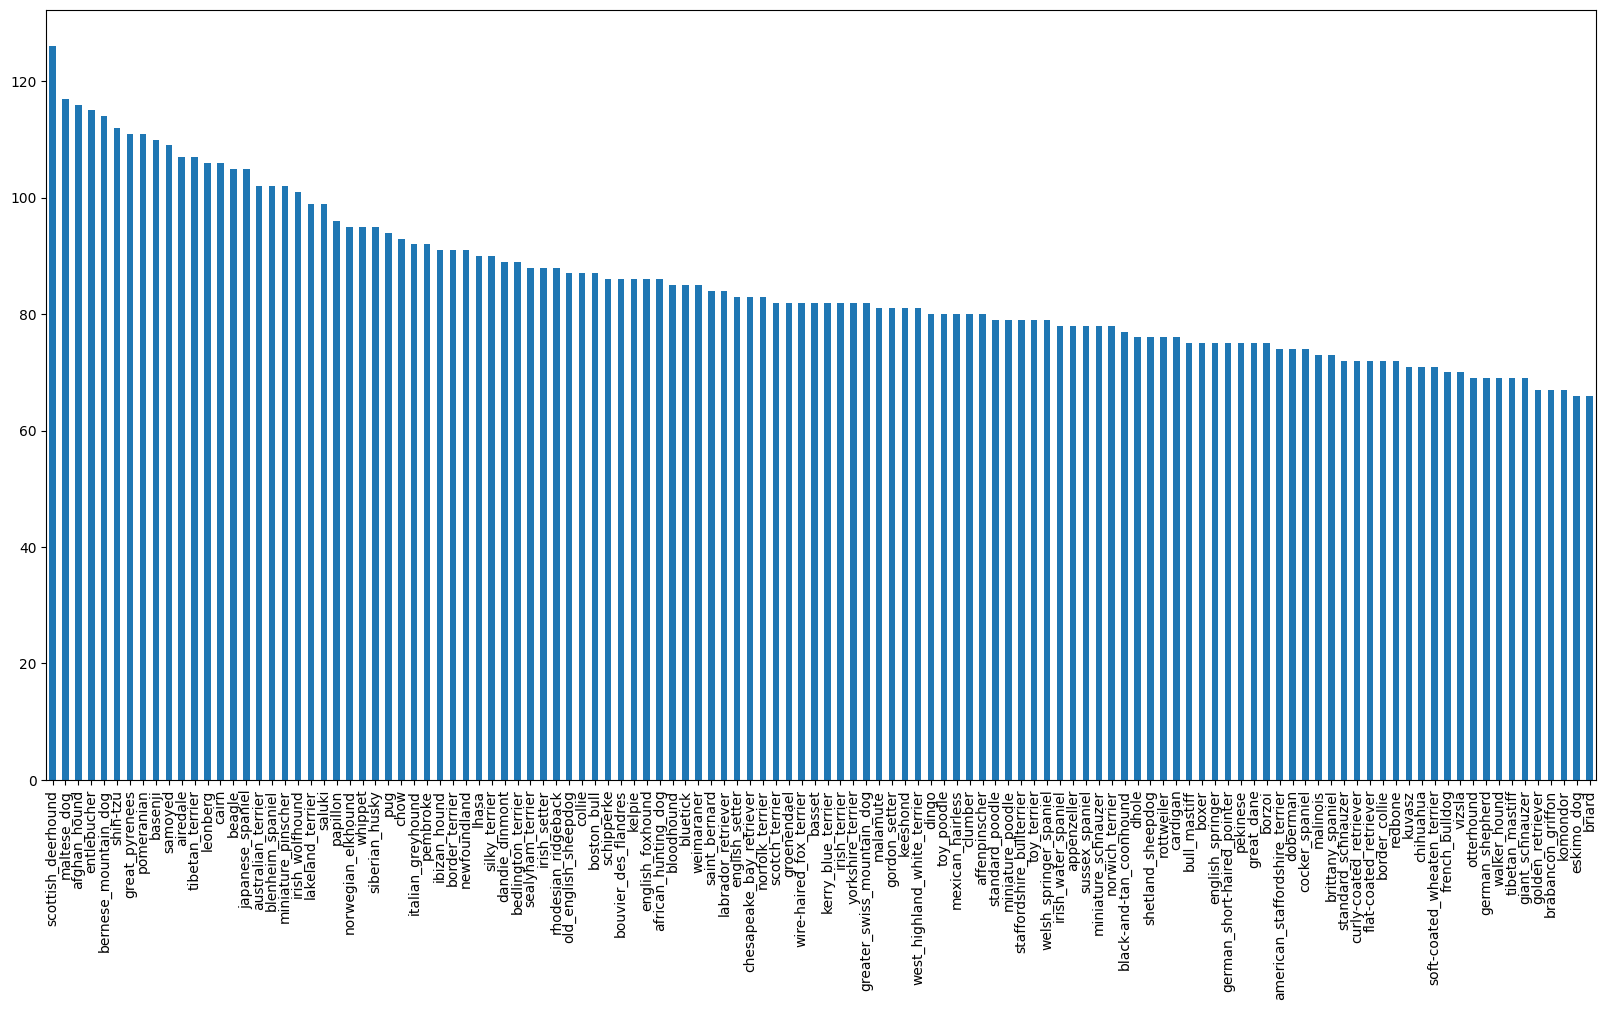

In [ ]:
labels['breed'].value_counts().plot.bar(figsize=(20,10))

In [ ]:
# Viewing an image inside colab can be through Ipython.display.image

## Getting images and their labels

In [ ]:
filename = [f'/content/drive/MyDrive/dogVision/trainFolder/{fname}.jpg' for fname in labels['id']]
filename[:10] # Creating a list of the images through their IDs

['/content/drive/MyDrive/dogVision/trainFolder/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/dogVision/trainFolder/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/dogVision/trainFolder/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/dogVision/trainFolder/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/dogVision/trainFolder/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/dogVision/trainFolder/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/dogVision/trainFolder/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/dogVision/trainFolder/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/dogVision/trainFolder/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/dogVision/trainFolder/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Checking the number of files in filename to be the same as that in the actual dirve
import os
if len(os.listdir("drive/MyDrive/dogVision/trainFolder")) == len(filename):
  print("Proceed")
else:
  print("Error: Check the parent directory for the correct number of files")


Proceed


## Changing the data to numbers

In [ ]:
breed_labels = labels['breed'].to_numpy() # Changes to an numpy array

In [ ]:
# checking the number of labels equal to number of filenames
if len(labels) == len(filename):
  print("proceed")
else:
  print("Error: length mismatch, check the parent directory")

proceed


In [ ]:
unique_breed = np.unique(labels['breed'])
boolean_labels = [label == unique_breed for label in labels['breed']]
'''
The above code transforms the breed of the dogs which is in the form of a label
into a boolean array by comparing it to the unique breeds present in the dataset
We can now use OneHotEncoder on the boolean array to transform it to numbers
'''

'\nThe above code transforms the breed of the dogs which is in the form of a label\ninto a boolean array by comparing it to the unique breeds present in the dataset\nWe can now use OneHotEncoder on the boolean array to transform it to numbers\n'

In [ ]:
# Printing the original label
#print(labels['breed'][0])
#print(np.where(unique_breed == labels['breed'][0])) # Returns an index for the element where the condition satisfies
#print(boolean_labels[0].argmax()) # Index where the label occurs in the boolean array
#print(boolean_labels[0].astype(int)) # 1 for True 0 for False

## Creating a Validation set

In [ ]:
X = filename
Y = boolean_labels

In [ ]:
NUM_IMAGES = 1000 # @param {type:"slider", min:1000, max:10000, step:1000}


In [ ]:
# Splitting the images into test, validation and training sets
x_train, x_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  Y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)



## Preprocessing Images

In [ ]:
# Turning images / data into tensors
from matplotlib.pyplot import imread
image = imread(filename[0])
image

array([[[108,  46,   0],
        [152,  92,  42],
        [180, 120,  70],
        ...,
        [176, 144,  69],
        [189, 157,  82],
        [214, 182, 107]],

       [[151,  93,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 136,  56],
        [172, 139,  60],
        [188, 157,  77]],

       [[151,  98,  56],
        [188, 137,  94],
        [162, 113,  70],
        ...,
        [200, 168,  81],
        [196, 162,  75],
        [200, 168,  81]],

       ...,

       [[189, 122,  69],
        [186, 119,  66],
        [183, 116,  63],
        ...,
        [213, 160, 106],
        [212, 159, 107],
        [209, 156, 102]],

       [[186, 119,  66],
        [184, 117,  64],
        [183, 116,  63],
        ...,
        [197, 145,  88],
        [199, 146,  92],
        [199, 147,  90]],

       [[182, 115,  62],
        [181, 114,  61],
        [183, 116,  63],
        ...,
        [184, 132,  74],
        [190, 138,  81],
        [192, 140,  82]]

In [ ]:
tf.constant(image) # Turning to tensors

<tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[108,  46,   0],
        [152,  92,  42],
        [180, 120,  70],
        ...,
        [176, 144,  69],
        [189, 157,  82],
        [214, 182, 107]],

       [[151,  93,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 136,  56],
        [172, 139,  60],
        [188, 157,  77]],

       [[151,  98,  56],
        [188, 137,  94],
        [162, 113,  70],
        ...,
        [200, 168,  81],
        [196, 162,  75],
        [200, 168,  81]],

       ...,

       [[189, 122,  69],
        [186, 119,  66],
        [183, 116,  63],
        ...,
        [213, 160, 106],
        [212, 159, 107],
        [209, 156, 102]],

       [[186, 119,  66],
        [184, 117,  64],
        [183, 116,  63],
        ...,
        [197, 145,  88],
        [199, 146,  92],
        [199, 147,  90]],

       [[182, 115,  62],
        [181, 114,  61],
        [183, 116,  63],
        ...,
        [184, 132,  7

In [ ]:
# Define the image size
IMG_SIZE = 224
# Creating a function to preprocess the images
def process_image(image_path):
  image = tf.io.read_file(image_path)
  # Turning the image data into three colour channels (r,g,b)
  image = tf.image.decode_jpeg(image, channels=3)
  # Converting the image coulour channel from a 0-255 value to 0-1 value
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resizing the image to (224,224)
  image = tf.image.resize(image,size=[IMG_SIZE, IMG_SIZE])
  return image



## Turning the data in batches

In [ ]:
def get_image_label(image_path, label):
  image = process_image(image_path)
  return image,label

In [ ]:
# DEfine the batch size
BATCH_SIZE=32

def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels

    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
#creating the training and validation batches
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing the batches to understand better

In [ ]:
def show25Images(images,labels):
  plt.figure(figsize=(10,10))

  for i in range(25):
    ax=plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breed[labels[i].argmax()])


In [ ]:
train_images,train_labels = next(train_data.as_numpy_iterator())

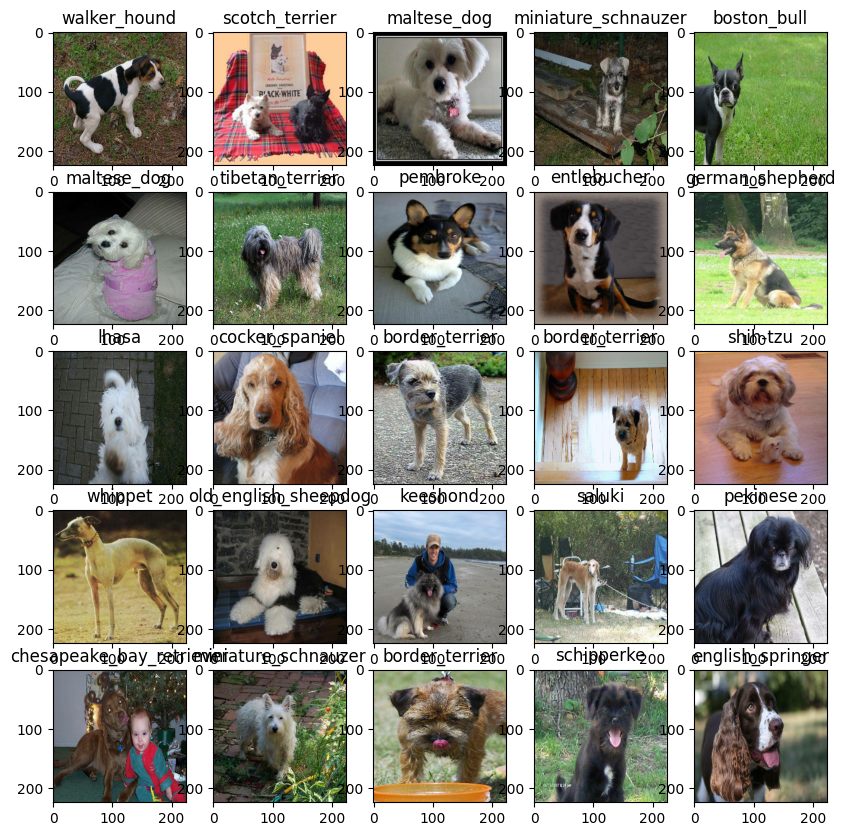

In [ ]:
show25Images(train_images,train_labels)

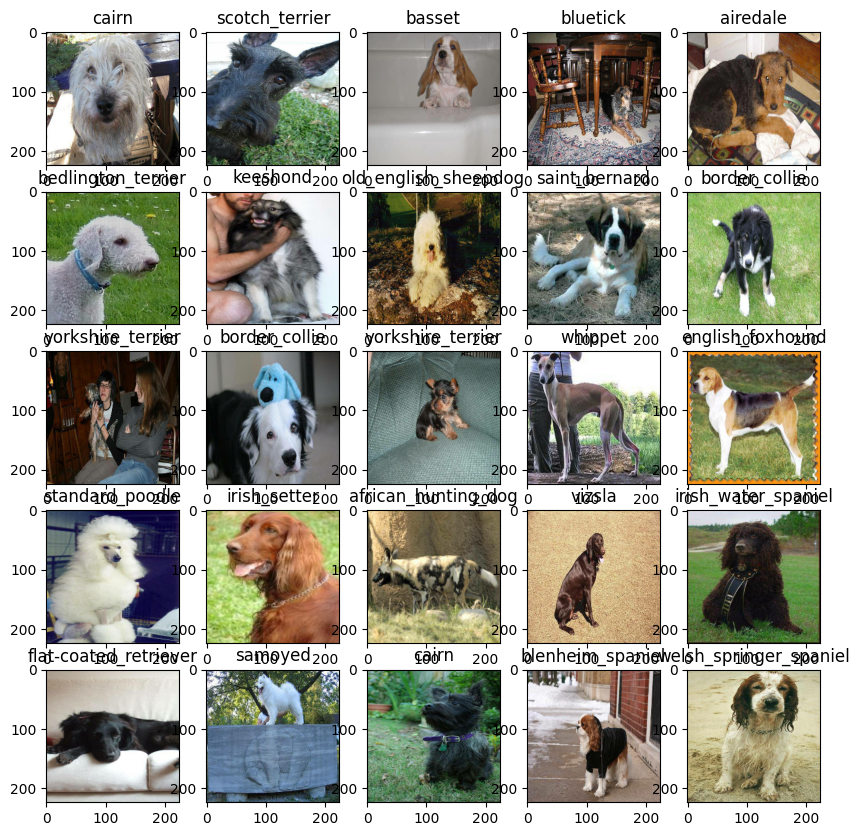

In [ ]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show25Images(val_images,val_labels)

In [ ]:
# Setting up the input shape

INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour_channels
OUTPUT_SHAPE = len(unique_breed)
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"



In [ ]:
# Create a function whih builds a keras model

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url = MODEL_URL):
  print(f"Building the model with: {MODEL_URL}")
  # It is a linear stack of layers, it tells it create a keras layer with the model url
  """
  the model_net_v2 that we are using is a transfer learning example which takes care of the
  data transformation involved when viewing the image.
  The model described below is a transfer learning model which is deriving it's model from the MODEL_URL
  Sequential just means that it is a linear layer of models stacked upon each other

  """
  '''
  softmax = a normalized exponential function after which each of the component is in the interval of 0 to 1
  each of the component will add up to 1
  '''
  model = tf.keras.Sequential([
  hub.KerasLayer(MODEL_URL), # input layer
  tf.keras.layers.Dense(units=OUTPUT_SHAPE, activation="softmax") # output layer
  ])

  """
  when we are compiling the model
  loss = goal to minimize the loss, higher the loss worse is the model
  optimizer = basing the instruction on how it performs in real time, to improve the model
  the type of loss function depends on the problem
  """
  #compiling the model
  model.compile(
      optimizer = tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )
  model.build(INPUT_SHAPE)
  return model

In [ ]:
model = create_model()
model.summary()

Building the model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_1 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________
